In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import re
from collections import defaultdict

In [35]:
plt.style.use("default")
sns.set_theme(
    context="paper",
    style="white",
    palette="tab10",
    font="serif",
    font_scale=3,
    color_codes=True,
    rc={"text.usetex": True},
)

In [36]:
data_dir = "../output/rossler_hc/"
fig_dir = "../figures/"

AND_metrics = glob(data_dir + "AND/*/*metrics.txt")
NAND_metrics = glob(data_dir + "NAND/*/*metrics.txt")
NOR_metrics = glob(data_dir + "NOR/*/*metrics.txt")
OR_metrics = glob(data_dir + "OR/*/*metrics.txt")
XOR_metrics = glob(data_dir + "XOR/*/*metrics.txt")
XNOR_metrics = glob(data_dir + "XNOR/*/*metrics.txt")


In [37]:
AND_metrics

['../output/rossler_hc/AND/c0.00_seed2/AND_metrics.txt',
 '../output/rossler_hc/AND/c0.00_seed1/AND_metrics.txt',
 '../output/rossler_hc/AND/c0.00_seed0/AND_metrics.txt']

### Data manip

In [38]:
and_metric_dict = defaultdict(list)

In [39]:
def extract_c_and_seed(file_path):
    match = re.search(r"c(\d+\.\d+)_seed(\d+)", file_path)
    if match:
        return float(match.group(1)), int(match.group(2))
    return None, None

In [40]:
for path in AND_metrics:
    c, seed = extract_c_and_seed(path)
    if c is not None:
        array = np.loadtxt(path, delimiter=",")
        and_metric_dict[c].append(array)

In [41]:
and_metric_dict.keys()

dict_keys([0.0])

In [42]:
average_AND_metric = {
    key: np.nanmean(and_metric_dict[key], axis=0) for key in and_metric_dict
}
std_AND_metric = {key: np.std(and_metric_dict[key], axis=0) for key in and_metric_dict}


In [43]:
c_list = list(average_AND_metric.keys())
c_list.sort()
final_mean_metric = np.array([average_AND_metric[c][-1] for c in c_list])
final_std_metric = np.array([std_AND_metric[c][-1] for c in c_list])

In [44]:
final_mean_metric

array([[4.9000000e+03, 5.5832545e-01, 7.5000000e-01]])

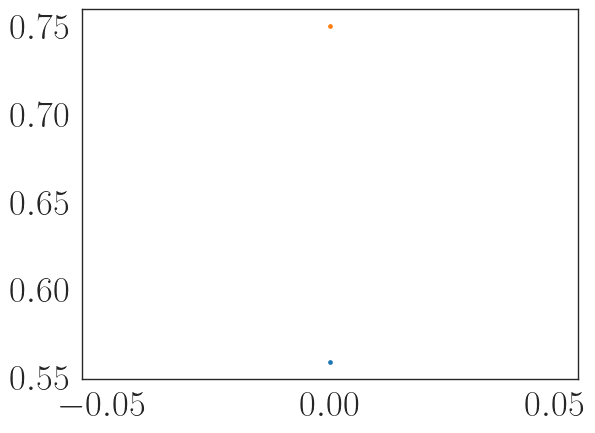

In [45]:
plt.plot(c_list, final_mean_metric[:, 1], ".", label="Loss")
# add configence interval
plt.fill_between(
    c_list,
    final_mean_metric[:, 1] - final_std_metric[:, 1],
    final_mean_metric[:, 1] + final_std_metric[:, 1],
    alpha=0.2,
)
plt.plot(c_list, final_mean_metric[:, 2], ".", label="Accuracy")
plt.fill_between(
    c_list,
    final_mean_metric[:, 2] - final_std_metric[:, 2],
    final_mean_metric[:, 2] + final_std_metric[:, 2],
    alpha=0.2,
)

### All gates

In [46]:
# Initialize dictionaries for each gate
nand_metric_dict = defaultdict(list)
nor_metric_dict = defaultdict(list)
or_metric_dict = defaultdict(list)
xor_metric_dict = defaultdict(list)
xnor_metric_dict = defaultdict(list)


# Function to process metrics for a given gate
def process_metrics(metrics, metric_dict):
    for path in metrics:
        c, seed = extract_c_and_seed(path)
        if c is not None:
            array = np.loadtxt(path, delimiter=",")
            metric_dict[c].append(array)


# Process metrics for each gate
process_metrics(NAND_metrics, nand_metric_dict)
process_metrics(NOR_metrics, nor_metric_dict)
process_metrics(OR_metrics, or_metric_dict)
process_metrics(XOR_metrics, xor_metric_dict)
process_metrics(XNOR_metrics, xnor_metric_dict)

# Calculate average and standard deviation for each gate
average_NAND_metric = {
    key: np.nanmean(nand_metric_dict[key], axis=0) for key in nand_metric_dict
}
std_NAND_metric = {
    key: np.nanstd(nand_metric_dict[key], axis=0) for key in nand_metric_dict
}

average_NOR_metric = {
    key: np.nanmean(nor_metric_dict[key], axis=0) for key in nor_metric_dict
}
std_NOR_metric = {
    key: np.nanstd(nor_metric_dict[key], axis=0) for key in nor_metric_dict
}

average_OR_metric = {
    key: np.nanmean(or_metric_dict[key], axis=0) for key in or_metric_dict
}
std_OR_metric = {key: np.nanstd(or_metric_dict[key], axis=0) for key in or_metric_dict}

average_XOR_metric = {
    key: np.nanmean(xor_metric_dict[key], axis=0) for key in xor_metric_dict
}
std_XOR_metric = {
    key: np.nanstd(xor_metric_dict[key], axis=0) for key in xor_metric_dict
}

average_XNOR_metric = {
    key: np.nanmean(xnor_metric_dict[key], axis=0) for key in xnor_metric_dict
}
std_XNOR_metric = {
    key: np.nanstd(xnor_metric_dict[key], axis=0) for key in xnor_metric_dict
}

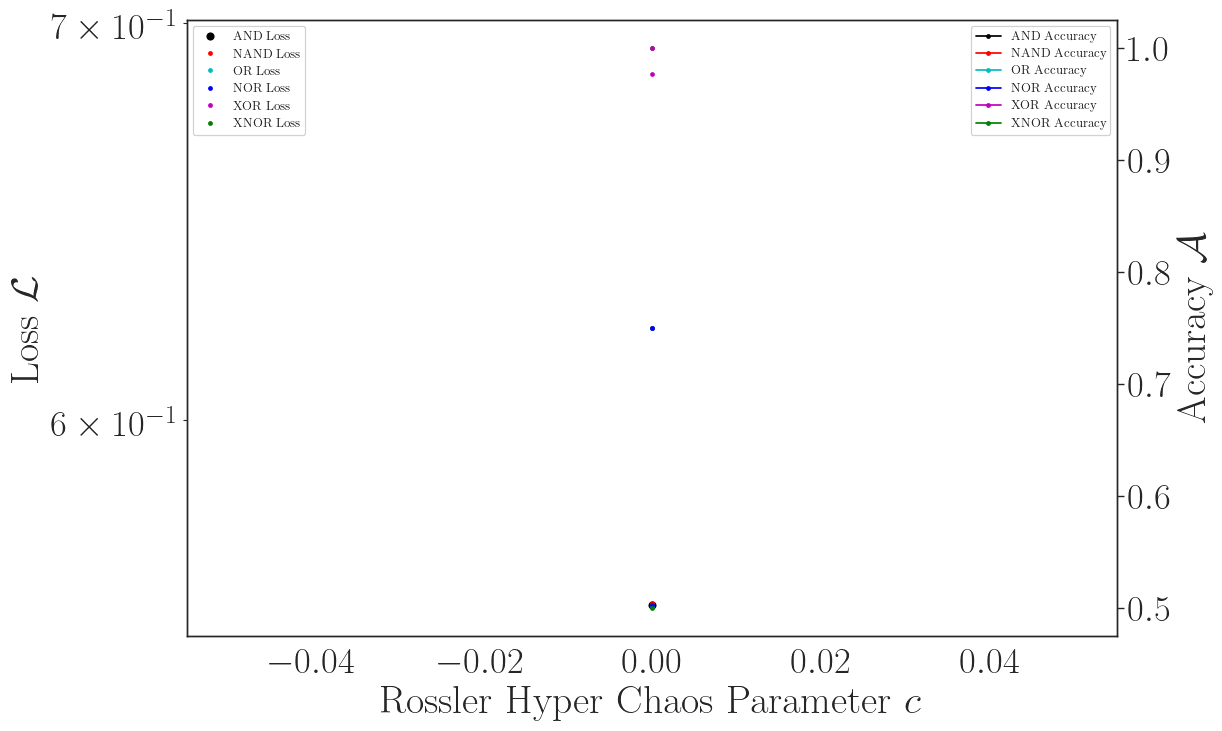

In [47]:
# Plot final metrics for all gates
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a secondary y-axis
ax2 = ax1.twinx()

# AND gate
ax1.plot(c_list, [average_AND_metric[a][-1][1] for a in c_list], "ko", label="AND Loss")
ax1.fill_between(
    c_list,
    [average_AND_metric[c][-1][1] - std_AND_metric[c][-1][1] for c in c_list],
    [average_AND_metric[c][-1][1] + std_AND_metric[c][-1][1] for c in c_list],
    color="k",
    alpha=0.2,
)

ax2.plot(
    c_list,
    [average_AND_metric[a][-1][2] for a in c_list],
    "k.-",
    label="AND Accuracy",
)
ax2.fill_between(
    c_list,
    [average_AND_metric[c][-1][2] - std_AND_metric[c][-1][2] for c in c_list],
    [average_AND_metric[c][-1][2] + std_AND_metric[c][-1][2] for c in c_list],
    color="k",
    alpha=0.2,
)

# NAND gate
ax1.plot(
    c_list,
    [average_NAND_metric[a][-1][1] for a in c_list],
    "r.",
    label="NAND Loss",
)
ax1.fill_between(
    c_list,
    [average_NAND_metric[c][-1][1] - std_NAND_metric[c][-1][1] for c in c_list],
    [average_NAND_metric[c][-1][1] + std_NAND_metric[c][-1][1] for c in c_list],
    color="r",
    alpha=0.2,
)
ax2.plot(
    c_list,
    [average_NAND_metric[a][-1][2] for a in c_list],
    "r.-",
    label="NAND Accuracy",
)
ax2.fill_between(
    c_list,
    [average_NAND_metric[c][-1][2] - std_NAND_metric[c][-1][2] for c in c_list],
    [average_NAND_metric[c][-1][2] + std_NAND_metric[c][-1][2] for c in c_list],
    color="r",
    alpha=0.2,
)

# OR gate
ax1.plot(c_list, [average_OR_metric[a][-1][1] for a in c_list], "c.", label="OR Loss")
ax1.fill_between(
    c_list,
    [average_OR_metric[c][-1][1] - std_OR_metric[c][-1][1] for c in c_list],
    [average_OR_metric[c][-1][1] + std_OR_metric[c][-1][1] for c in c_list],
    color="c",
    alpha=0.2,
)
ax2.plot(
    c_list,
    [average_OR_metric[c][-1][2] for c in c_list],
    "c.-",
    label="OR Accuracy",
)
ax2.fill_between(
    c_list,
    [average_OR_metric[c][-1][2] - std_OR_metric[c][-1][2] for c in c_list],
    [average_OR_metric[c][-1][2] + std_OR_metric[c][-1][2] for c in c_list],
    color="c",
    alpha=0.2,
)

# NOR gate
ax1.plot(c_list, [average_NOR_metric[a][-1][1] for a in c_list], "b.", label="NOR Loss")
ax1.fill_between(
    c_list,
    [average_NOR_metric[c][-1][1] - std_NOR_metric[c][-1][1] for c in c_list],
    [average_NOR_metric[c][-1][1] + std_NOR_metric[c][-1][1] for c in c_list],
    color="b",
    alpha=0.2,
)
ax2.plot(
    c_list,
    [average_NOR_metric[c][-1][2] for c in c_list],
    "b.-",
    label="NOR Accuracy",
)
ax2.fill_between(
    c_list,
    [average_NOR_metric[c][-1][2] - std_NOR_metric[c][-1][2] for c in c_list],
    [average_NOR_metric[c][-1][2] + std_NOR_metric[c][-1][2] for c in c_list],
    color="b",
    alpha=0.2,
)


# XOR gate
ax1.plot(
    c_list,
    [average_XOR_metric[c][-1][1] for c in c_list],
    "m.",
    label="XOR Loss",
)
ax1.fill_between(
    c_list,
    [average_XOR_metric[c][-1][1] - std_XOR_metric[c][-1][1] for c in c_list],
    [average_XOR_metric[c][-1][1] + std_XOR_metric[c][-1][1] for c in c_list],
    color="m",
    alpha=0.2,
)
ax2.plot(
    c_list,
    [average_XOR_metric[c][-1][2] for c in c_list],
    "m.-",
    label="XOR Accuracy",
)
ax2.fill_between(
    c_list,
    [average_XOR_metric[c][-1][2] - std_XOR_metric[c][-1][2] for c in c_list],
    [average_XOR_metric[c][-1][2] + std_XOR_metric[c][-1][2] for c in c_list],
    color="m",
    alpha=0.2,
)

# XNOR gate
ax1.plot(
    c_list,
    [average_XNOR_metric[c][-1][1] for c in c_list],
    "g.",
    label="XNOR Loss",
)
ax1.fill_between(
    c_list,
    [average_XNOR_metric[c][-1][1] - std_XNOR_metric[c][-1][1] for c in c_list],
    [average_XNOR_metric[c][-1][1] + std_XNOR_metric[c][-1][1] for c in c_list],
    color="g",
    alpha=0.2,
)
ax2.plot(
    c_list,
    [average_XNOR_metric[c][-1][2] for c in c_list],
    "g.-",
    label="XNOR Accuracy",
)
ax2.fill_between(
    c_list,
    [average_XNOR_metric[c][-1][2] - std_XNOR_metric[c][-1][2] for c in c_list],
    [average_XNOR_metric[c][-1][2] + std_XNOR_metric[c][-1][2] for c in c_list],
    color="g",
    alpha=0.2,
)

# Set logarithmic scale for loss
ax1.set_yscale("log")

# Labels and title
ax1.set_xlabel("Rossler Hyper Chaos Parameter $c$")
ax1.set_ylabel("Loss $\\mathcal{L}$")
ax2.set_ylabel("Accuracy $\\mathcal{A}$")
# Create separate legends for loss and accuracy
loss_legend = ax1.legend(
    loc="upper left", bbox_to_anchor=(0, 1), bbox_transform=ax1.transAxes, fontsize=9
)
accuracy_legend = ax2.legend(
    loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, fontsize=9
)

# Add the legends to the figure
fig.add_artist(loss_legend)
fig.add_artist(accuracy_legend)
# plt.title("Final Metrics of All Gates with logistic sweep")
plt.savefig(f"{fig_dir}/rossler_hc_sweep.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{fig_dir}/rossler_hc_sweep.pdf", dpi=300, bbox_inches="tight")
plt.savefig(f"{fig_dir}/rossler_hc_sweep.svg", dpi=300, bbox_inches="tight")
plt.show()

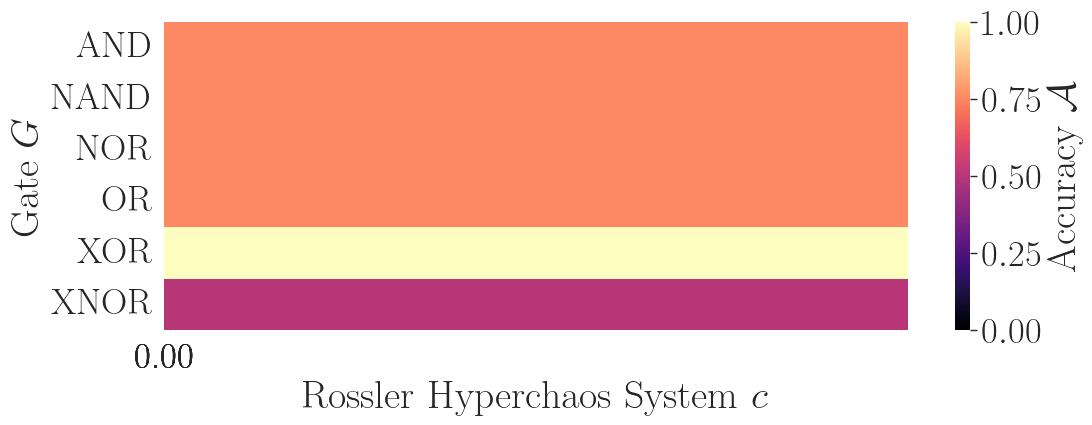

In [48]:
# Prepare data for matrix plot
gates = ["AND", "NAND", "NOR", "OR", "XOR", "XNOR"]
metrics_dict = {
    "AND": average_AND_metric,
    "NAND": average_NAND_metric,
    "NOR": average_NOR_metric,
    "OR": average_OR_metric,
    "XOR": average_XOR_metric,
    "XNOR": average_XNOR_metric,
}

# Create a matrix of accuracies
accuracy_matrix = np.zeros((len(gates), len(c_list)))

for i, gate in enumerate(gates):
    for j, c in enumerate(c_list):
        if c in metrics_dict[gate]:
            accuracy_matrix[i, j] = metrics_dict[gate][c][-1][
                2
            ]  # Accuracy is at index 2

# Create a matrix plot
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the matrix
sns.heatmap(
    accuracy_matrix,
    yticklabels=gates,
    cmap="magma",
    ax=ax,
    cbar_kws={"label": "Accuracy $\\mathcal{A}$"},
    vmin=0,
    vmax=1,
)
ax.set_xlabel("Rossler Hyperchaos System $c$")
ax.set_xticks(np.linspace(0, len(c_list) - 1, 5))
ax.set_xticklabels(
    [f"{c_list[int(i)]:.2f}" for i in np.linspace(0, len(c_list) - 1, 5)]
)
ax.set_ylabel("Gate $G$")

plt.savefig(f"{fig_dir}/rossler_hc_grid.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{fig_dir}/rossler_hc_grid.pdf", dpi=300, bbox_inches="tight")
plt.savefig(f"{fig_dir}/rossler_hc_grid.svg", dpi=300, bbox_inches="tight")
plt.show()

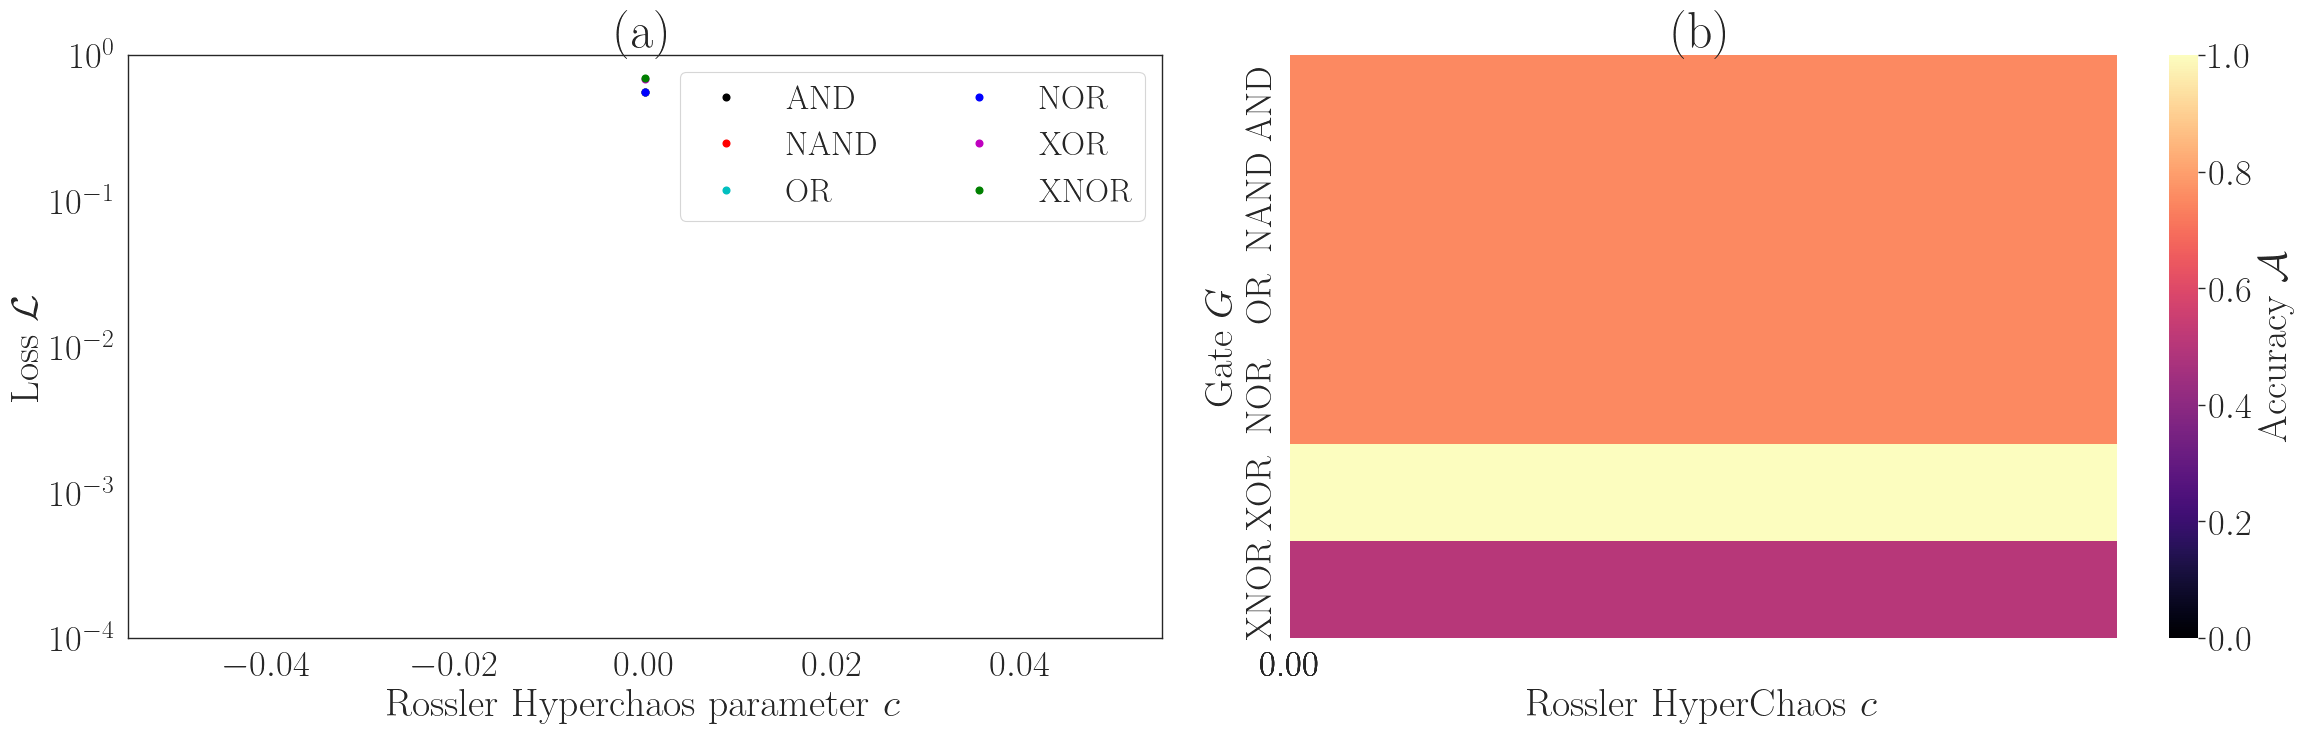

In [49]:
# Create a figure with 2 axes
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(24, 8))

# AND gate
ax1.plot(c_list, [average_AND_metric[a][-1][1] for a in c_list], "ko", label="AND")
# ax1.fill_between(
#     c_list,
#     [average_AND_metric[a][-1][1] - std_AND_metric[a][-1][1] for a in c_list],
#     [average_AND_metric[a][-1][1] + std_AND_metric[a][-1][1] for a in c_list],
#     color="k",
#     alpha=0.2,
# )

# NAND gate
ax1.plot(c_list, [average_NAND_metric[a][-1][1] for a in c_list], "ro", label="NAND")
# ax1.fill_between(
#     c_list,
#     [average_NAND_metric[a][-1][1] - std_NAND_metric[a][-1][1] for a in c_list],
#     [average_NAND_metric[a][-1][1] + std_NAND_metric[a][-1][1] for a in c_list],
#     color="r",
#     alpha=0.2,
# )

# OR gate
ax1.plot(c_list, [average_OR_metric[a][-1][1] for a in c_list], "co", label="OR")
# ax1.fill_between(
#     c_list,
#     [average_OR_metric[a][-1][1] - std_OR_metric[a][-1][1] for a in c_list],
#     [average_OR_metric[a][-1][1] + std_OR_metric[a][-1][1] for a in c_list],
#     color="c",
#     alpha=0.2,
# )

# NOR gate
ax1.plot(c_list, [average_NOR_metric[a][-1][1] for a in c_list], "bo", label="NOR")
# ax1.fill_between(
#     c_list,
#     [average_NOR_metric[a][-1][1] - std_NOR_metric[a][-1][1] for a in c_list],
#     [average_NOR_metric[a][-1][1] + std_NOR_metric[a][-1][1] for a in c_list],
#     color="b",
#     alpha=0.2,
# )

# XOR gate
ax1.plot(c_list, [average_XOR_metric[a][-1][1] for a in c_list], "mo", label="XOR")
# ax1.fill_between(
#     c_list,
#     [average_XOR_metric[a][-1][1] - std_XOR_metric[a][-1][1] for a in c_list],
#     [average_XOR_metric[a][-1][1] + std_XOR_metric[a][-1][1] for a in c_list],
#     color="m",
#     alpha=0.2,
# )

# XNOR gate
ax1.plot(c_list, [average_XNOR_metric[a][-1][1] for a in c_list], "go", label="XNOR")
# ax1.fill_between(
#     c_list,
#     [average_XNOR_metric[a][-1][1] - std_XNOR_metric[a][-1][1] for a in c_list],
#     [average_XNOR_metric[a][-1][1] + std_XNOR_metric[a][-1][1] for a in c_list],
#     color="g",
#     alpha=0.2,
# )

# Set logarithmic scale for loss
ax1.set_yscale("log")
ax1.set_ylim(0.0001, 1)

# Labels and title for the first plot
ax1.set_xlabel("Rossler Hyperchaos parameter  $c$")
ax1.set_ylabel("Loss $\\mathcal{L}$")
ax1.set_title("(a)", fontsize=36)
ax1.legend(loc="best", fontsize=24, ncols=2)
# # Create separate legends for loss and accuracy
# loss_legend = ax1.legend(
#     loc="upper right", bbox_to_anchor=(0, 1), bbox_transform=ax1.transAxes, fontsize=16
# )
# # Add the legends to the figure
# fig.add_artist(loss_legend)

# Prepare data for matrix plot
gates = ["AND", "NAND", "OR", "NOR", "XOR", "XNOR"]
metrics_dict = {
    "AND": average_AND_metric,
    "NAND": average_NAND_metric,
    "OR": average_OR_metric,
    "NOR": average_NOR_metric,
    "XOR": average_XOR_metric,
    "XNOR": average_XNOR_metric,
}

# Create a matrix of accuracies
accuracy_matrix = np.zeros((len(gates), len(c_list)))

for i, gate in enumerate(gates):
    for j, a in enumerate(c_list):
        if a in metrics_dict[gate]:
            accuracy_matrix[i, j] = metrics_dict[gate][a][-1][
                2
            ]  # Accuracy is at index 2

# Plot the matrix
sns.heatmap(
    accuracy_matrix,
    yticklabels=gates,
    cmap="magma",
    ax=ax3,
    cbar_kws={"label": "Accuracy $\\mathcal{A}$"},
    vmin=0,
    vmax=1,
)
ax3.set_xlabel("Rossler HyperChaos $c$")
ax3.set_xticks(np.linspace(0, len(c_list) - 1, 5))
ax3.set_xticklabels(
    [f"{c_list[int(i)]:.2f}" for i in np.linspace(0, len(c_list) - 1, 5)]
)
ax3.set_ylabel("Gate $G$")
ax3.set_title("(b)", fontsize=36)

plt.tight_layout()
plt.savefig(f"{fig_dir}/rossler_hc_combined_plot.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{fig_dir}/rossler_hc_combined_plot.pdf", dpi=300, bbox_inches="tight")
plt.savefig(f"{fig_dir}/rossler_hc_combined_plot.svg", dpi=300, bbox_inches="tight")
plt.show()